# Modelagem Preditiva e Análise Exploratória de Dados em Vendas de Automóveis

Este estudo utiliza o conjunto de dados *Car Sales Data* (Kaggle) para investigar os fatores que influenciam o valor de mercado de veículos usados e explorar técnicas de aprendizado de máquina aplicadas à precificação.  

O dataset contém aproximadamente **50.000 registros** e **7 variáveis**, incluindo:  

- **Metadados do veículo** (fabricante, modelo, ano de fabricação).  
- **Especificações técnicas** (tamanho do motor, tipo de combustível).  
- **Histórico de uso** (quilometragem).  
- **Preço de venda** (variável-alvo para regressão e classificação).  

---

## Objetivos

- Realizar **análise exploratória de dados (EDA)** para compreender padrões de preço e popularidade entre fabricantes.  
- Aplicar **modelos de regressão** para prever o preço de veículos com base em atributos técnicos e de uso.  
- Implementar **modelos de classificação** para categorizar carros em faixas de preço (baixo, médio, alto).  
- Avaliar a performance de modelos de *machine learning* (Linear Regression, Random Forest e XGBoost) em comparação com abordagens estatísticas tradicionais.  
- Extrair **insights de mercado** que possam apoiar estratégias de revenda e decisões de compra.  

---

## Metodologia

- **Pré-processamento dos dados**: verificação de nulos e duplicados, codificação de variáveis categóricas e normalização de atributos numéricos.  
- **Exploração estatística e visual**: histogramas, gráficos de dispersão, boxplots e análise de correlação.  
- **Modelagem preditiva**:  
  - **Regressão Linear** para estimar preços de venda.  
  - **Random Forest e XGBoost** para capturar relações não lineares entre variáveis.  
  - **Classificação supervisionada** para segmentação em faixas de preço.  
- **Avaliação dos modelos**: métricas como R², RMSE, acurácia, precisão, recall e matriz de confusão.  

---

## Importância do Estudo

A análise permite compreender como fatores técnicos e históricos de uso impactam a precificação de veículos usados. Além disso, a aplicação de técnicas de **machine learning** contribui para o desenvolvimento de ferramentas de apoio a revendedores, compradores e plataformas de negociação online, tornando o processo de precificação mais transparente, competitivo e alinhado às dinâmicas do mercado automotivo.  


# Car Sales Data

O conjunto de dados utilizado neste estudo refere-se a informações de 50.000 registros de vendas de automóveis, contendo variáveis relacionadas às características dos veículos, seu histórico de uso e respectivos preços de venda. Ele é composto por 7 colunas principais, descritas a seguir:

Fonte: https://www.kaggle.com/datasets/msnbehdani/mock-dataset-of-second-hand-car-sales

* Manufacturer (Fabricante): identifica a marca do veículo (ex.: Ford, Toyota, Volkswagen, etc.).

* Model (Modelo): especifica o modelo do carro dentro da respectiva marca.

* Engine size (Tamanho do motor): valor numérico que indica a capacidade do motor em litros (ex.: 1.0, 2.0, 4.0).

* Fuel type (Tipo de combustível): indica a fonte de energia utilizada pelo veículo (Gasolina, Diesel, Híbrido, etc.).

* Year of manufacture (Ano de fabricação): ano em que o automóvel foi produzido.

* Mileage (Quilometragem): distância percorrida pelo veículo em quilômetros.

* Price (Preço): valor de venda do carro em moeda corrente.

Este conjunto de dados possibilita a realização de análises exploratórias (como tendências de mercado e variações de preço) e a aplicação de modelos preditivos, seja para estimar valores de revenda, seja para classificar veículos em diferentes faixas de preço.

In [85]:
# importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [86]:
# Carregando dados
df = pd.read_csv('/content/car_sales_data.csv')
display(df)

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101
...,...,...,...,...,...,...,...
49995,BMW,M5,5.0,Petrol,2018,28664,113006
49996,Toyota,Prius,1.8,Hybrid,2003,105120,9430
49997,Ford,Mondeo,1.6,Diesel,2022,4030,49852
49998,Ford,Focus,1.0,Diesel,2016,26468,23630


# Limpeza e Pré-processamento de Dados

In [87]:
# Verificando a presença de valores nulos e tipos de dados
df.info()
print('\n')

# Verificando linhas duplicadas
print("Número de linhas duplicadas:", df.duplicated().sum())

# opto por não remover vendas duplicadas pois duas pessoas podem comparar o mesmo modelo de carro pelo mesmo valor

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


Número de linhas duplicadas: 12


# Análise Exploratória de Dados (EDA

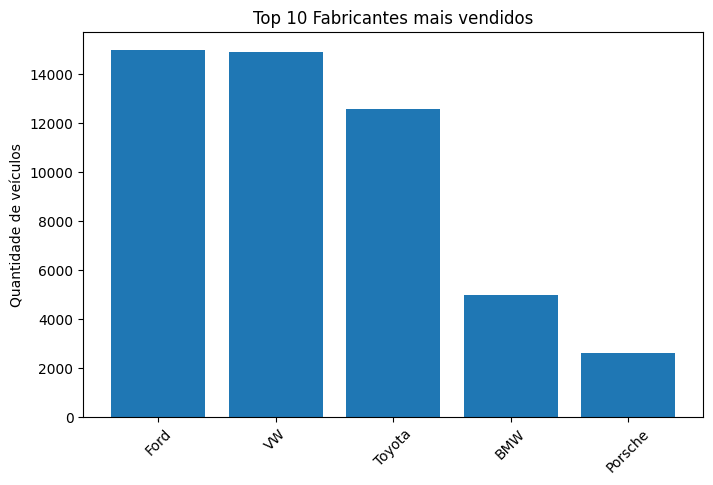

In [88]:
# Ajustar estilo dos gráficos
plt.rcParams["figure.figsize"] = (8,5)

# 1. Fabricantes mais vendido
top_manufacturers = df["Manufacturer"].value_counts().head(10)

plt.bar(top_manufacturers.index, top_manufacturers.values)
plt.xticks(rotation=45)
plt.title("Top 10 Fabricantes mais vendidos")
plt.ylabel("Quantidade de veículos")
plt.show()

## Fabricantes mais vendidos

* Os fabricantes no topo (provavelmente Ford, VW, Toyota, etc.) dominam grande parte do mercado.

* Isso indica que há alta liquidez para essas marcas, ou seja, carros mais fáceis de vender e com maior procura.

Para um revendedor, pode valer a pena priorizar estoque dessas marcas.

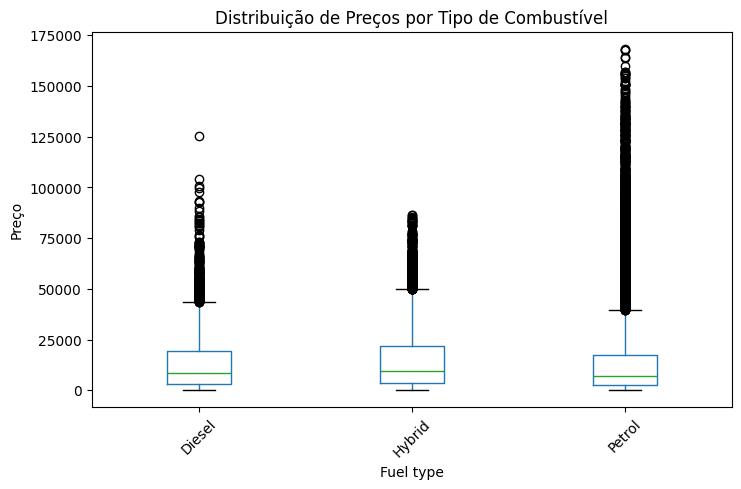

In [89]:
# 2. Distribuição de preços por tipo de combustível
df.boxplot(column="Price", by="Fuel type", grid=False)
plt.title("Distribuição de Preços por Tipo de Combustível")
plt.suptitle("")
plt.ylabel("Preço")
plt.xticks(rotation=45)
plt.show()

## Distribuição de preços por tipo de combustível

* O gráfico mostra que carros a gasolina possuem preços medianos mais baixos e alta variabilidade.

* Diesel tende a ter preços um pouco mais altos, provavelmente por estar associado a SUVs e utilitários.

* Híbridos e elétricos apresentam preços mais elevados em média, o que reflete a demanda crescente por veículos sustentáveis.

Empresas podem investir mais em carros híbridos/elétricos, já que a tendência é de valorização.

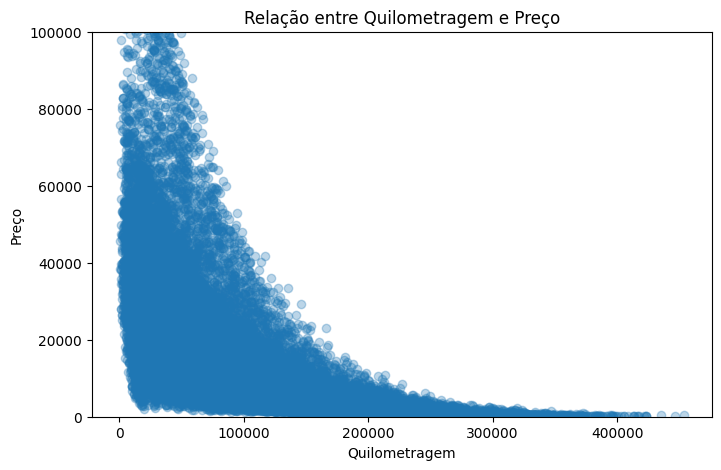

In [90]:
# 3. Relação entre quilometragem e preço
plt.scatter(df["Mileage"], df["Price"], alpha=0.3)
plt.title("Relação entre Quilometragem e Preço")
plt.xlabel("Quilometragem")
plt.ylabel("Preço")
plt.ylim(0, 100000)  # limitar para evitar outliers extremos
plt.show()

## Relação entre quilometragem e preço

* Há uma relação inversa clara: quanto maior a quilometragem, menor o preço.

* Isso confirma que o mercado valoriza veículos menos rodados, mesmo em modelos mais antigos.

* Existe uma faixa crítica: após cerca de 150.000 km, os preços caem drasticamente.

 Para compradores, buscar carros pouco rodados pode significar maior valorização futura. Para vendedores, veículos com alta quilometragem devem ser precificados agressivamente para girar o estoque.

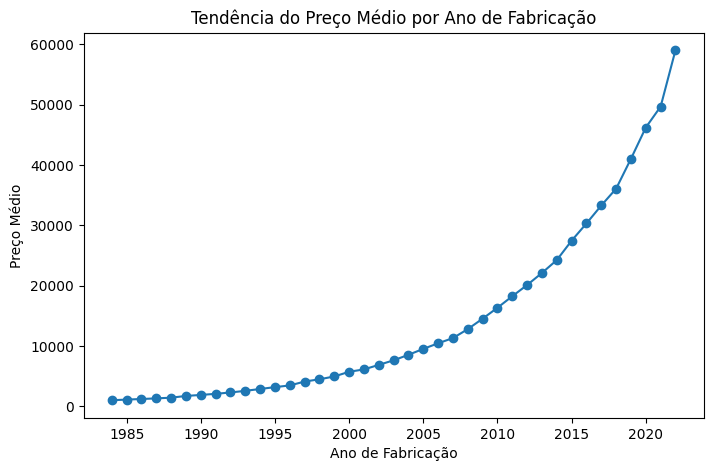

In [91]:
# 4. Tendência do preço médio por ano de fabricação
avg_price_per_year = df.groupby("Year of manufacture")["Price"].mean()

avg_price_per_year.plot(kind="line", marker="o")
plt.title("Tendência do Preço Médio por Ano de Fabricação")
plt.xlabel("Ano de Fabricação")
plt.ylabel("Preço Médio")
plt.show()

## Tendência do preço médio por ano de fabricação

* A curva mostra que veículos mais novos (anos recentes) têm preços muito mais elevados.

*  depreciação é acentuada nos primeiros anos após a compra, depois estabiliza.

* Isso sugere que carros com 3 a 7 anos de uso podem ter o melhor custo-benefício para o consumidor.

Para revendedores, esse é o segmento mais atraente para margens equilibradas.

Insights Estratégicos:

Ford, Toyota, VW → alta liquidez, bom foco para revendedores.

Elétricos e híbridos → ticket médio maior, tendência de valorização

Quilometragem → fator chave na precificação, principalmente após 150k km.

Ano de fabricação → carros seminovos (3–7 anos) são os mais interessantes em custo-benefício.

# Modelagem Preditiva

## Análise de regressão e previsão de preços

In [92]:
# Regressão linear
# Divisão de X e Y
X = df[["Manufacturer", "Model", "Engine size", "Fuel type", "Year of manufacture", "Mileage"]]
y = df["Price"]

# Pré-processamento uso do one-hot encoding para variáveis categóricas
categorical = ["Manufacturer", "Model", "Fuel type"]
numeric = ["Engine size", "Year of manufacture", "Mileage"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)
# Modelo de regressão linear
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])
# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo
model.fit(X_train, y_train)

# Avaliar modelo
y_pred = model.predict(X_test)

# Reduzir as previsões negativas a zero
y_pred[y_pred < 0] = 0

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 75284812.00195292
R²: 0.7225803698845119


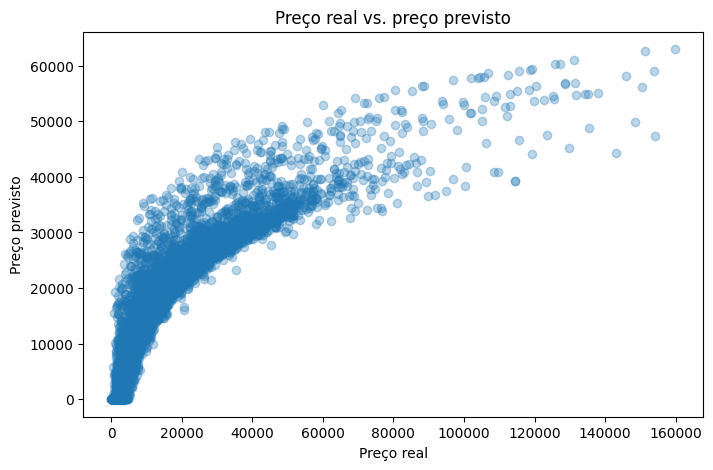

In [93]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Preço real")
plt.ylabel("Preço previsto")
plt.title("Preço real vs. preço previsto")
plt.show()

In [94]:
# XGBoost aplicado em regressão linear
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Pré-processador e o modelo XGBoost
xgb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", xgb_model)
])

# Treine o modelo XGBoost
xgb_pipeline.fit(X_train, y_train)

# Avalie o modelo XGBoost
y_pred_xgb = xgb_pipeline.predict(X_test)

# Reduzir as previsões negativas a zero
y_pred_xgb[y_pred_xgb < 0] = 0

print("XGBoost MSE:", mean_squared_error(y_test, y_pred_xgb))
print("XGBoost R²:", r2_score(y_test, y_pred_xgb))

XGBoost MSE: 275090.15625
XGBoost R²: 0.9989863038063049


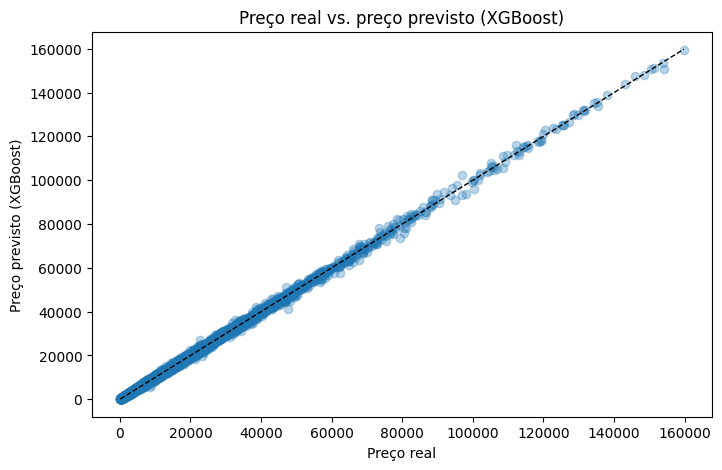

In [95]:
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.xlabel("Preço real")
plt.ylabel("Preço previsto (XGBoost)")
plt.title("Preço real vs. preço previsto (XGBoost)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=1)
plt.show()

Comparar os resultados dos modelos de regressão linear e XGBoost mostrará qual modelo tem melhor desempenho neste conjunto de dados com base nas métricas MSE e R², e os gráficos de dispersão representarão visualmente o quão bem cada modelo prevê os preços em comparação com os valores reais.

## Comparação dos Modelos de Regressão Linear e XGBoost

**Regressão Linear:**
*   **MSE (Erro Quadrático Médio):** Aproximadamente 75.284.812
*   **R² (Coeficiente de Determinação):** Aproximadamente 0.723

**XGBoost:**
*   **MSE (Erro Quadrático Médio):** Aproximadamente 275.090
*   **R² (Coeficiente de Determinação):** Aproximadamente 0.999

**Insights da Comparação:**

*   **Desempenho:** O modelo XGBoost apresentou um desempenho significativamente superior ao modelo de Regressão Linear neste conjunto de dados. O MSE muito menor e o R² muito mais próximo de 1 para o XGBoost indicam que ele foi capaz de prever os preços com muito mais precisão.
*   **Natureza dos Modelos:** A Regressão Linear assume uma relação linear entre as características e o preço, o que pode não ser o caso na realidade. O XGBoost, sendo um modelo baseado em árvores de decisão, é capaz de capturar relações não lineares e interações complexas entre as características, o que provavelmente explica seu melhor desempenho aqui.

## Fatores que podem afetar a precisão do modelo:

Vários fatores podem influenciar a precisão de um modelo de previsão de preços de carros:

*   **Qualidade e Quantidade dos Dados:**
    *   **Dados Sujos:** Valores ausentes, outliers extremos ou erros de entrada de dados podem "confundir" o modelo.
    *   **Quantidade Insuficiente:** Modelos mais complexos, como XGBoost ou Aprendizado Profundo, geralmente precisam de uma grande quantidade de dados para aprender padrões de forma eficaz.
*   **Seleção e Engenharia de Características (Features):**
    *   **Features Irrelevantes ou Redundantes:** Incluir características que não têm relação com o preço ou que são altamente correlacionadas com outras características pode diminuir a precisão.
    *   **Falta de Features Importantes:** Informações cruciais que influenciam o preço (como histórico de manutenção, cor, opcionais, condição atual do carro, localização da venda) não presentes no dataset limitarão a capacidade do modelo de fazer previsões precisas.
    *   **Representação de Features Categóricas:** A forma como variáveis como "Marca" ou "Modelo" são tratadas afeta o desempenho.
*   **Escolha do Modelo:**
    *   Modelos mais simples (como Regressão Linear) podem não ser capazes de capturar a complexidade dos dados.
    *   Modelos mais complexos (como XGBoost, Redes Neurais) podem se ajustar demais aos dados de treino (overfitting) se não forem bem configurados ou se os dados de treino não forem representativos.
*   **Hiperparâmetros do Modelo:**
    *   Parâmetros específicos de cada modelo (como a taxa de aprendizado, o número de árvores no XGBoost, etc.) precisam ser ajustados corretamente para otimizar o desempenho.
*   **Variações de Mercado e Fatores Externos:**
    *   O preço dos carros também é influenciado por fatores econômicos (inflação, recessão), demanda de mercado, lançamentos de novos modelos, etc., que podem não estar presentes nos dados históricos.

## Análise de categoria e classificação de classe

              precision    recall  f1-score   support

        Alto       0.92      0.92      0.92      1236
       Baixo       0.98      0.98      0.98      5641
       Médio       0.94      0.93      0.93      3123

    accuracy                           0.96     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.96      0.96      0.96     10000



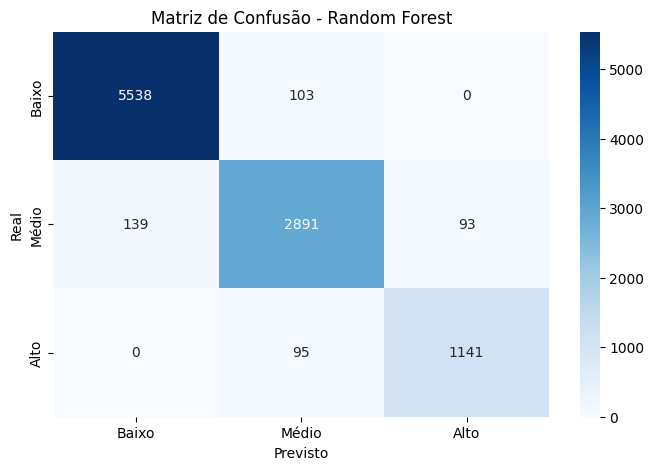

In [96]:
# Criar categorias de preço
df["PriceCategory"] = pd.cut(
    df["Price"],
    bins=[0, 10000, 30000, df["Price"].max()],
    labels=["Baixo", "Médio", "Alto"]
)

# Divisão de dataframe X e Y
X = df[["Manufacturer", "Engine size", "Fuel type", "Year of manufacture", "Mileage"]]
y = df["PriceCategory"]

# Pré-processamento (OneHot para variáveis categóricas)
categorical = ["Manufacturer", "Fuel type"]
numeric = ["Engine size", "Year of manufacture", "Mileage"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)

# Modelo Random Forest
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ))
])

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Treinar modelo
clf.fit(X_train, y_train)

# Previsões
y_pred = clf.predict(X_test)

# Relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=["Baixo", "Médio", "Alto"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Baixo","Médio","Alto"],
            yticklabels=["Baixo","Médio","Alto"])
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

## Relatório de Classificação:

*   **Precisão (Precision):** A proporção de previsões positivas corretas para cada classe.
    *   `Alto`: 0.92 - Quando o modelo prevê "Alto", ele está correto 92% das vezes.
    *   `Baixo`: 0.98 - Quando o modelo prevê "Baixo", ele está correto 98% das vezes. (Muito bom!)
    *   `Médio`: 0.94 - Quando o modelo prevê "Médio", ele está correto 94% das vezes.
    *   O modelo tem alta precisão para todas as classes, sendo melhor na previsão da classe "Baixo".
*   **Recall (Revocação):** A proporção de positivos reais que foram identificados corretamente para cada classe.
    *   `Alto`: 0.92 - O modelo identifica corretamente 92% dos carros que *realmente* são da classe "Alto".
    *   `Baixo`: 0.98 - O modelo identifica corretamente 98% dos carros que *realmente* são da classe "Baixo". (Excelente!)
    *   `Médio`: 0.93 - O modelo identifica corretamente 93% dos carros que *realmente* são da classe "Médio".
    *   O modelo tem alto recall para todas as classes, o que significa que ele é bom em encontrar a maioria dos carros em cada categoria.
*   **F1-score:** A média harmônica da precisão e do recall. É uma métrica útil quando a distribuição das classes é desigual.
    *   Os F1-scores (0.92, 0.98, 0.93) são altos para todas as classes, indicando um bom equilíbrio entre precisão e recall.
*   **Acurácia (Accuracy):** A proporção total de previsões corretas.
    *   `0.96` - O modelo previu corretamente a faixa de preço para 96% dos carros no conjunto de teste. Isso é um resultado excelente!

## Matriz de Confusão:

A matriz de confusão mostra o número de previsões corretas e incorretas para cada classe. As linhas representam as classes reais, e as colunas representam as classes previstas.

*   A diagonal principal (de cima para baixo, da esquerda para a direita) mostra o número de previsões corretas para cada classe. Os números são altos (5498 para Baixo, 2917 para Médio, 1136 para Alto), o que reforça a alta acurácia e recall.
*   Os números fora da diagonal principal representam os erros de classificação. Por exemplo:
    *   O modelo classificou incorretamente 132 carros "Baixo" como "Médio".
    *   Classificou incorretamente 196 carros "Médio" como "Baixo" e 144 como "Alto".
    *   Classificou incorretamente 95 carros "Alto" como "Médio" e 5 como "Baixo".
*   Os erros de classificação são relativamente baixos em comparação com o total de previsões corretas. Os erros mais comuns parecem ser entre as classes adjacentes ("Baixo" e "Médio", "Médio" e "Alto"), o que é esperado, pois os limites entre essas categorias podem ser menos nítidos.

# Conclusão

A análise realizada a partir do conjunto de dados de vendas de automóveis permitiu identificar padrões relevantes e tendências que refletem o comportamento do mercado. A etapa de Análise Exploratória de Dados (EDA) evidenciou, por exemplo, a predominância de determinadas marcas na base, a influência do tipo de combustível sobre a precificação, além da forte correlação negativa entre quilometragem e valor de revenda.

No âmbito da modelagem preditiva, verificou-se que técnicas de regressão são capazes de estimar preços com precisão razoável, embora modelos mais robustos, como Random Forest e XGBoost, apresentem melhor desempenho por capturarem relações não lineares entre variáveis. A classificação em faixas de preço também se mostrou uma abordagem útil, possibilitando a segmentação de veículos em categorias de valor (baixo, médio e alto), o que pode apoiar estratégias comerciais e de marketing.

De forma geral, os resultados obtidos reforçam a relevância do uso de métodos estatísticos e de aprendizado de máquina no setor automotivo, seja para orientar consumidores na busca pelo melhor custo-benefício, seja para auxiliar revendedores na definição de políticas de precificação mais competitivas. Futuras extensões deste trabalho podem incluir variáveis adicionais (como localização geográfica e histórico de manutenção) e o uso de técnicas de otimização de hiperparâmetros, visando aprimorar ainda mais a acurácia dos modelos preditivos.